In [209]:
import pandas as pd

In [210]:
data = pd.read_csv("../../data/Ana Health_Tabela Modelo Previsão Churn - Tabela.csv")

In [211]:
data.head()

,"PESSOA, PIPEDRIVE",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 63,Unnamed: 64,"COBRANÇA, VINDI",Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72
0,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
1,250,1971-04-01,64,82,São Paulo,São Paulo,04534-020,417,NaN,2021-01-28,...,2,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
2,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
3,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
4,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE


In [212]:
def column_label_to_index(col_label):
    col_index = 0
    for c in col_label.upper():
        col_index = col_index * 26 + (ord(c) - ord('A') + 1)
    return col_index - 1


def add_prefix_to_first_row(dataframe, prefix, start_col_label, end_col_label):
    start_col = column_label_to_index(start_col_label)
    end_col = column_label_to_index(end_col_label)
    for col in range(start_col, end_col + 1):
        dataframe.iat[0, col] = prefix + dataframe.iat[0, col]

In [213]:
add_prefix_to_first_row(data, 'PESSOA_PIPEDRIVE_', 'A', 'R')
add_prefix_to_first_row(data, 'FUNIL_ASSINATURA_PIPEDRIVE_', 'S', 'X')
add_prefix_to_first_row(data, 'FUNIL_ONBOARDING_PIPEDRIVE_', 'Y', 'AH')
add_prefix_to_first_row(data, 'ATENDIMENTOS_AGENDA_', 'AJ', 'AY')
add_prefix_to_first_row(data, 'WHOQOL_', 'AZ', 'BD')
add_prefix_to_first_row(data, 'COMUNICARE_', 'BE', 'BE')
add_prefix_to_first_row(data, 'TWILIO_', 'BF', 'BM')
add_prefix_to_first_row(data, 'COBRANÇA_VINDI_', 'BN', 'BU')

In [214]:
data.columns = data.iloc[0]
data = data.drop(data.index[0])

In [215]:
data.head()

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_birthdate,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_id_marrital_status,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_id_health_plan,PESSOA_PIPEDRIVE_id_person_recommendation,PESSOA_PIPEDRIVE_contract_start_date,...,TWILIO_Ligações Outbound,TWILIO_Data Última Ligações Outbound,COBRANÇA_VINDI_Qde Total de Faturas,COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança,COBRANÇA_VINDI_Método de Pagamento,COBRANÇA_VINDI_Valor Médio da Mensalidade,COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento,COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes,COBRANÇA_VINDI_Valor Total Inadimplência,COBRANÇA_VINDI_Qde Perfis de Pagamento Inativos
1,250,1971-04-01,64,82,São Paulo,São Paulo,04534-020,417,NaN,2021-01-28,...,2,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
2,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
3,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
4,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
5,317,1986-10-14,NaN,NaN,São Paulo,São Paulo,05421-050,NaN,NaN,2021-01-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE


In [216]:
import missingno as msno

<AxesSubplot:xlabel='0'>

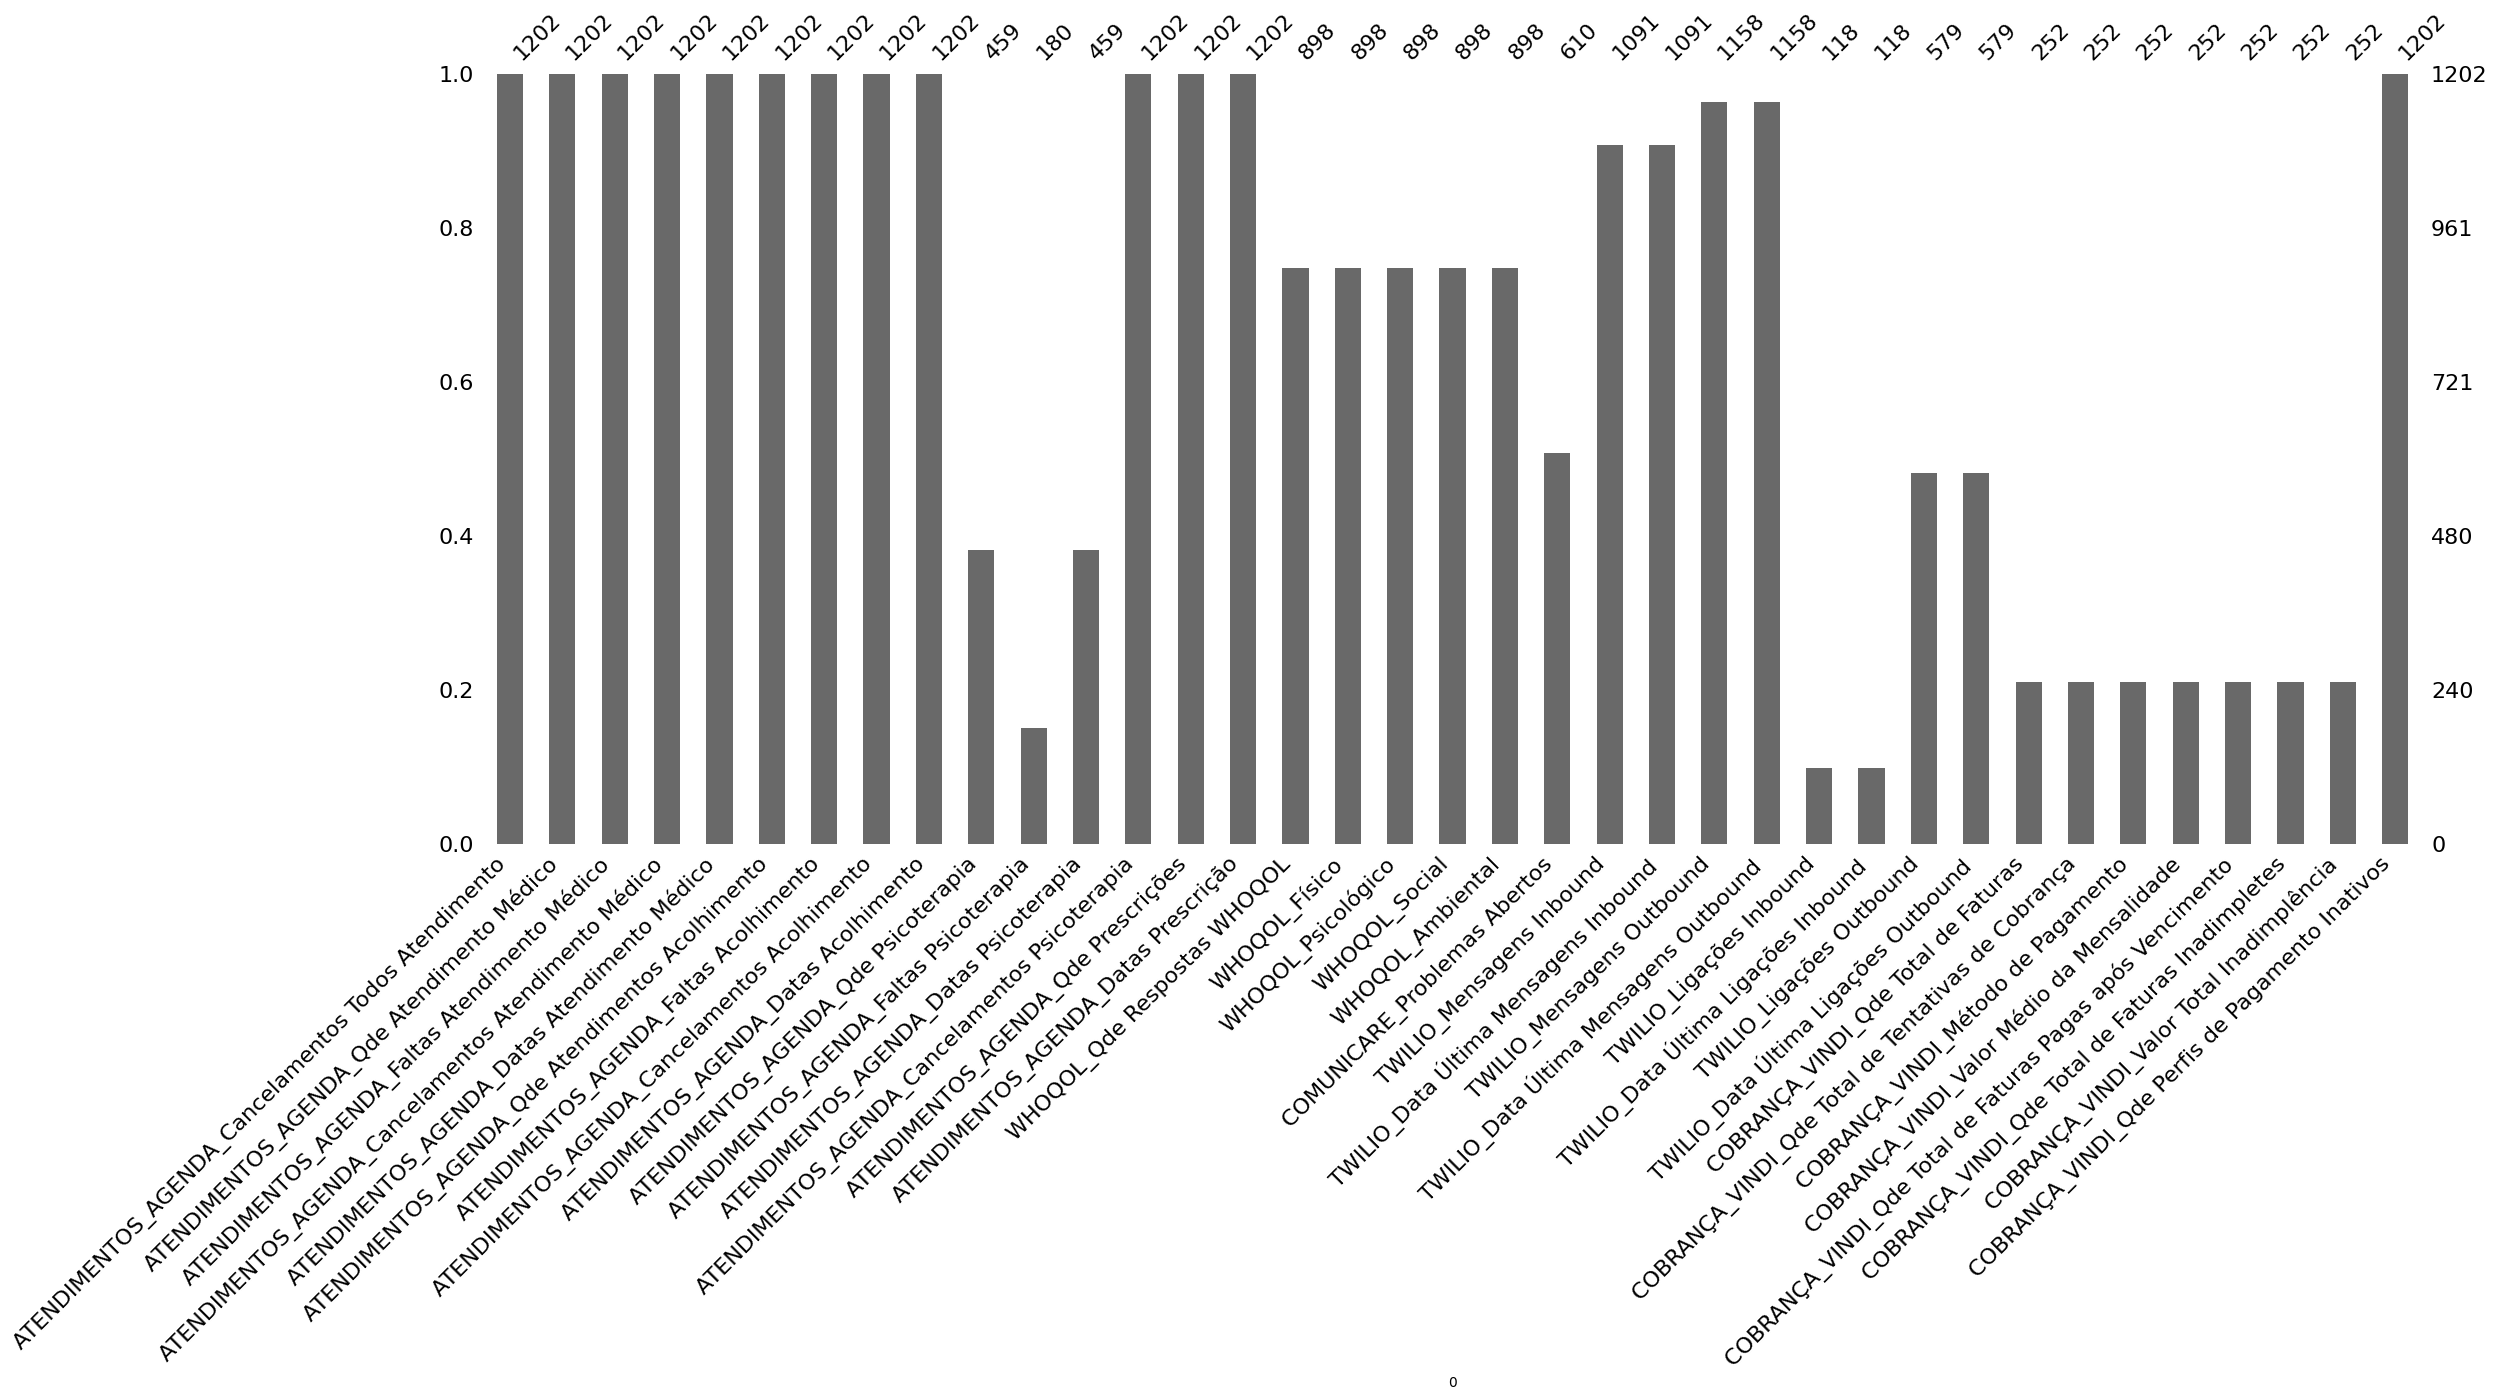

In [217]:
msno.bar(data.iloc[:,36:])

## Dropping columns with no information 2

    - ATENDIMENTOS_AGENDA_Faltas Psicoterapia: Contagem das faltas considerando apenas as sessões de psicoterapia
    
    - TWILIO_Ligações Inbound:  Contagem de ligação feitas pela pessoa

    - TWILIO_Data Última Ligações Inbound: Data da última ligação feitas pela pessoa

    - COBRANÇA_VINDI_Qde Total de Faturas : Contagem de faturas emitidas para associados PF

    - COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança: Contagem das tentativas de cobrança para associados PF

    - COBRANÇA_VINDI_Método de Pagamento : Método de pagamento utilizado por associados PF: Cartão de Crédito, Boleto, Dinheiro (Pix)

    - COBRANÇA_VINDI_Valor Médio da Mensalidade : Média do valor cobrado por mês de associados PF

    - COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento : Contagem de faturas pagas após o vencimento de associados PF

    - COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes : Contagem de faturas vendidas de associados PF

    - COBRANÇA_VINDI_Valor Total Inadimplência : Soma do valor das faturas vencidas de associados PF


In [218]:
data["ATENDIMENTOS_AGENDA_Faltas Psicoterapia"].value_counts()

1     85
2     36
3     17
4     14
5      9
8      7
6      6
7      4
12     1
10     1
Name: ATENDIMENTOS_AGENDA_Faltas Psicoterapia, dtype: int64

In [219]:
data["TWILIO_Ligações Inbound"].value_counts()

1     73
2     17
3      9
4      7
10     3
6      2
12     1
80     1
7      1
8      1
5      1
46     1
9      1
Name: TWILIO_Ligações Inbound, dtype: int64

In [220]:
data["TWILIO_Data Última Ligações Inbound"].value_counts()

2023-07-11 00:57:34    3
2023-04-21 15:35:54    2
2023-07-04 01:30:01    2
2022-09-29 11:53:43    1
2023-06-10 19:18:13    1
                      ..
2022-05-11 09:41:48    1
2022-05-08 13:19:22    1
2022-08-08 12:22:12    1
2023-09-16 14:21:26    1
2023-10-07 09:45:19    1
Name: TWILIO_Data Última Ligações Inbound, Length: 114, dtype: int64

In [221]:
data["COBRANÇA_VINDI_Qde Total de Faturas"].value_counts()

3     35
1     32
2     26
5     22
8     20
4     20
7     18
6     13
9     12
10     8
11     8
13     8
14     8
12     6
16     5
15     5
20     2
21     1
23     1
18     1
30     1
Name: COBRANÇA_VINDI_Qde Total de Faturas, dtype: int64

In [222]:
data["COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança"].value_counts()

1     27
3     23
7     23
2     20
5     19
8     16
12    14
4     14
9     10
14     9
6      9
11     9
16     7
17     6
13     6
15     5
10     5
0      5
19     3
21     3
23     2
32     2
25     2
37     1
35     1
27     1
40     1
20     1
18     1
31     1
26     1
41     1
30     1
24     1
29     1
28     1
Name: COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança, dtype: int64

In [223]:
data["COBRANÇA_VINDI_Método de Pagamento"].value_counts()

Cartão de crédito    227
Dinheiro              15
Boleto YaPay           9
Pix                    1
Name: COBRANÇA_VINDI_Método de Pagamento, dtype: int64

In [224]:
data["COBRANÇA_VINDI_Valor Médio da Mensalidade"].value_counts()

88.00     99
120.00    55
78.00     49
50.00      7
60.00      7
70.00      6
78.41      2
88.28      2
114.40     1
89.14      1
120.63     1
58.70      1
110.00     1
84.00      1
176.00     1
86.33      1
121.80     1
89.81      1
81.71      1
91.54      1
89.64      1
78.46      1
106.67     1
78.90      1
83.04      1
350.00     1
89.04      1
158.40     1
88.95      1
234.00     1
383.75     1
99.36      1
88.49      1
Name: COBRANÇA_VINDI_Valor Médio da Mensalidade, dtype: int64

In [225]:
data["COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento"].value_counts()

0    150
1     53
2     19
3     13
4      8
7      3
5      2
6      2
8      1
9      1
Name: COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento, dtype: int64

In [226]:
data["COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes"].value_counts()

0    218
1     20
2      7
3      4
4      1
6      1
7      1
Name: COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes, dtype: int64

In [227]:
data["COBRANÇA_VINDI_Valor Total Inadimplência"].value_counts()

0         218
120.00      8
88.00       7
78.00       3
234.00      2
156.00      2
264.00      2
352.00      2
158.40      1
312.00      1
350.00      1
420.00      1
179.65      1
616.00      1
176.00      1
60.00       1
Name: COBRANÇA_VINDI_Valor Total Inadimplência, dtype: int64

In [228]:
data = data.drop(["ATENDIMENTOS_AGENDA_Faltas Psicoterapia","TWILIO_Ligações Inbound", "TWILIO_Data Última Ligações Inbound","COBRANÇA_VINDI_Qde Total de Faturas","COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança","COBRANÇA_VINDI_Método de Pagamento","COBRANÇA_VINDI_Valor Médio da Mensalidade","COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento","COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes","COBRANÇA_VINDI_Valor Total Inadimplência"], axis=1)

<AxesSubplot:xlabel='0'>

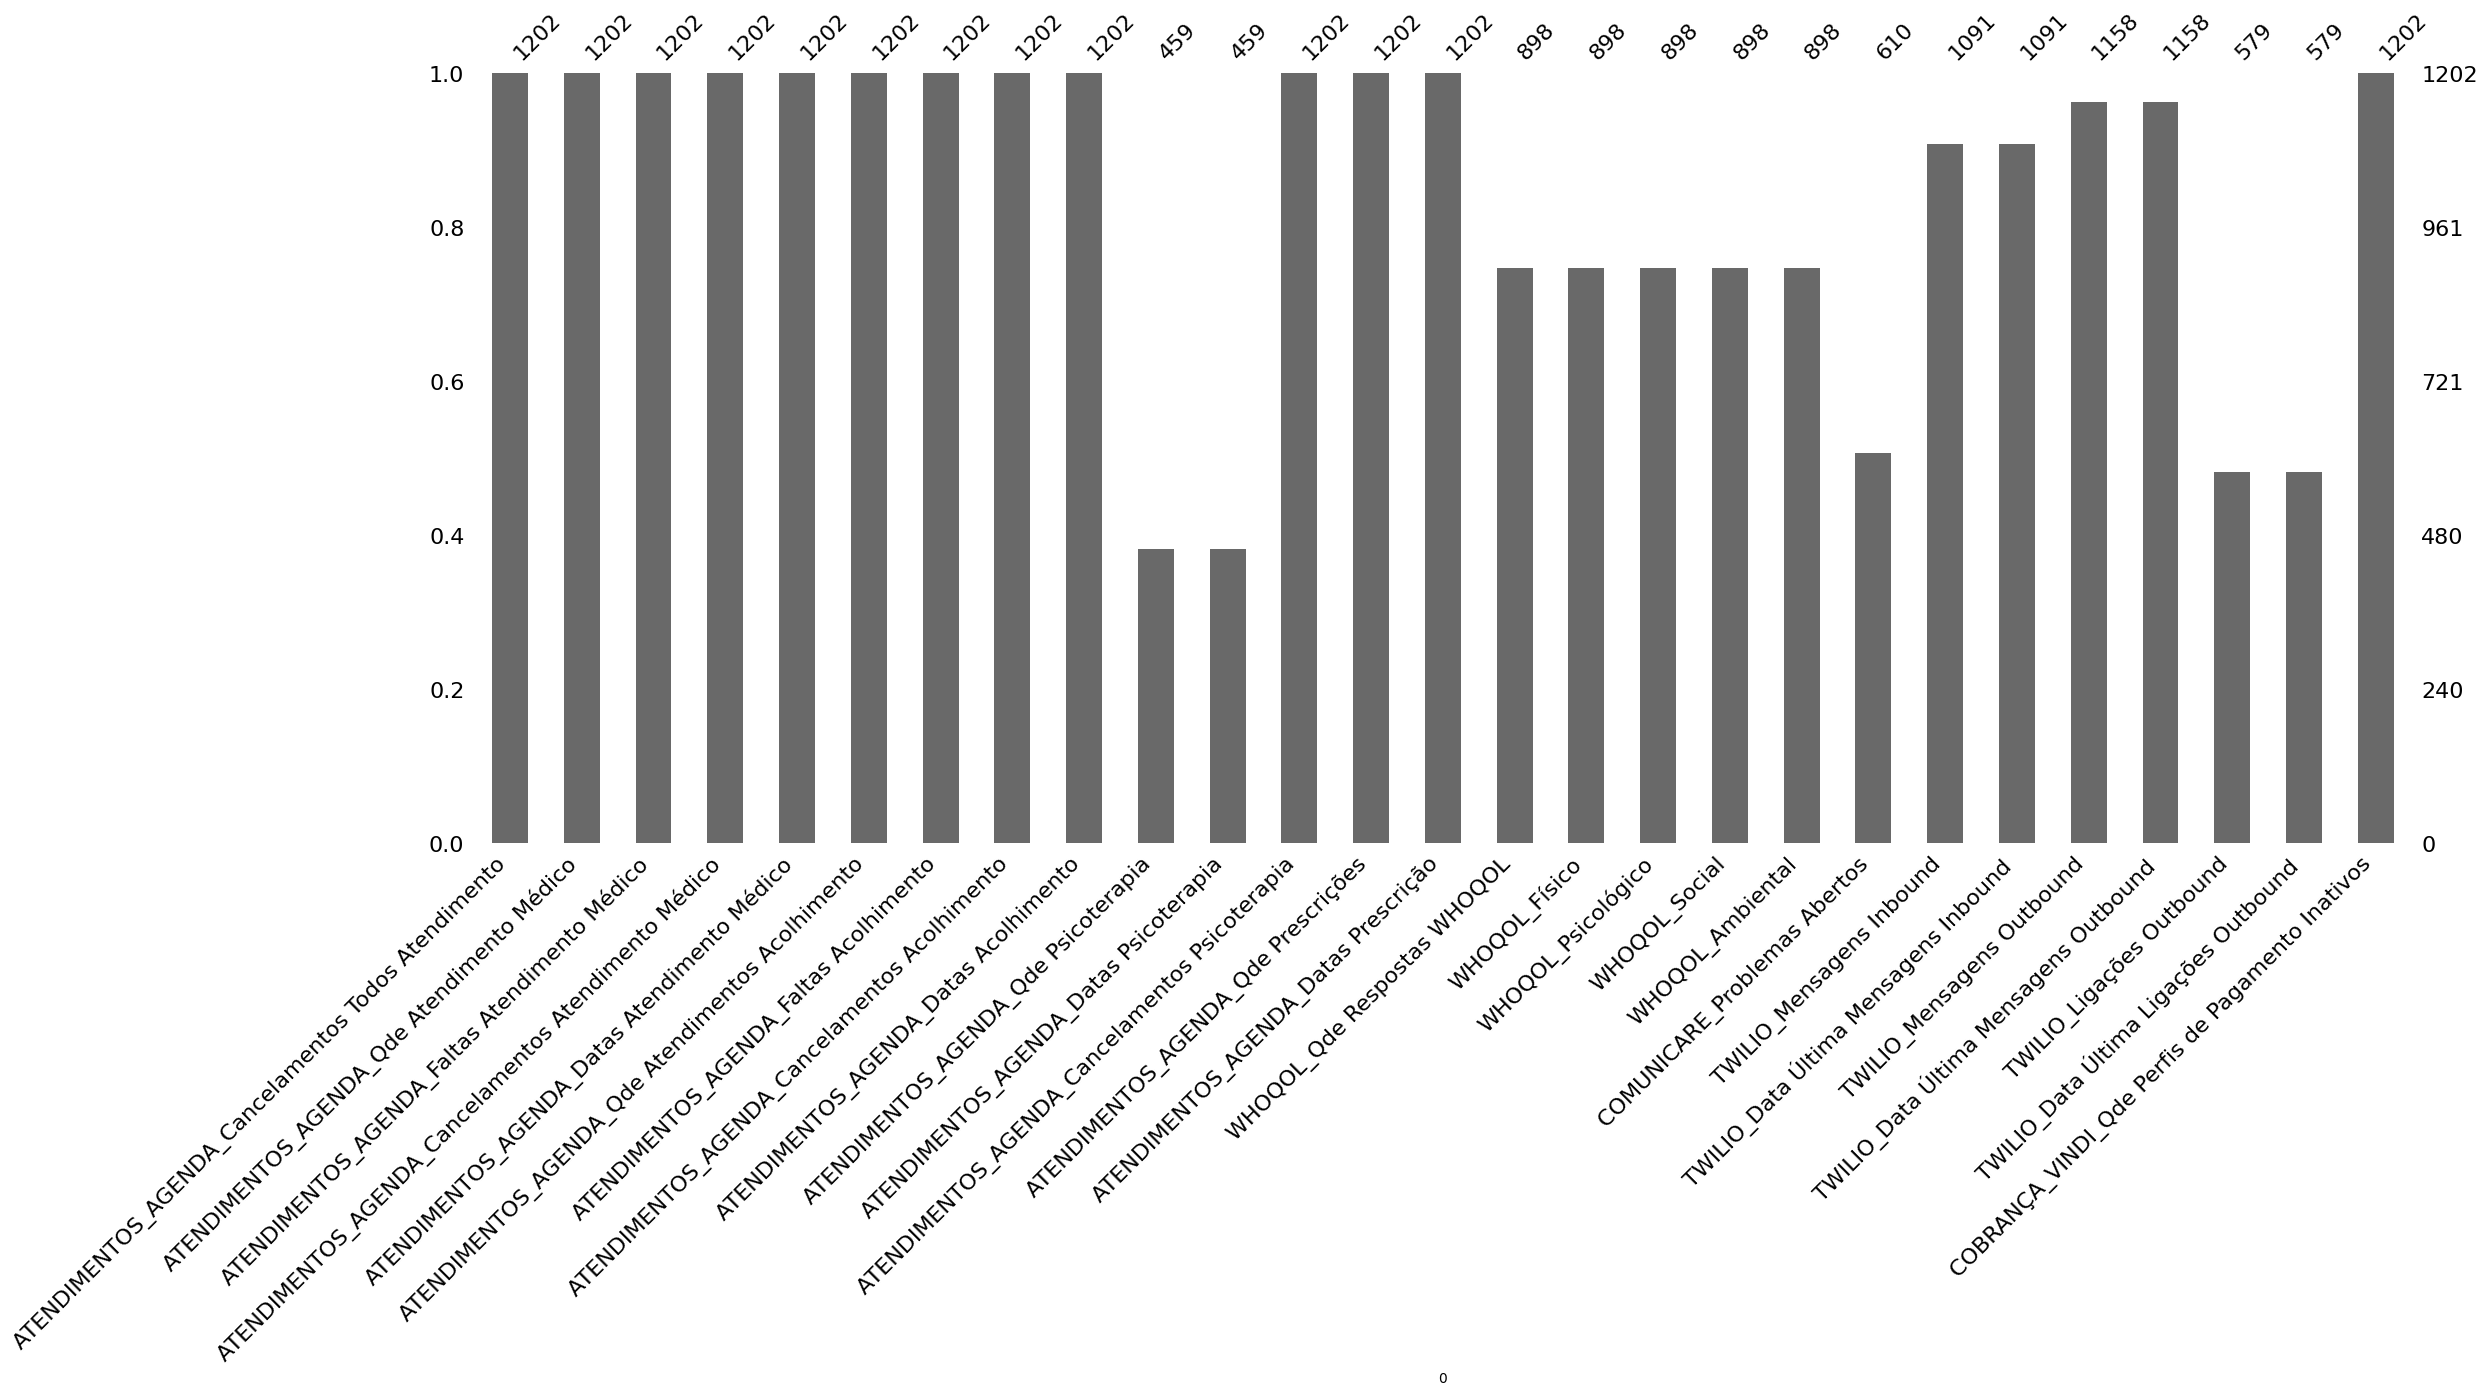

In [229]:
msno.bar(data.iloc[:,36:])

## Analisando as colunas com mais de 40% de valores não nulos

## TWILIO_Mensagens Outbound

Descrição : Contagem de mensagens enviadas pela equipe de saúde

Observação : Valores Nan podem ser consideradores como "não há mensagens enviadas pela equipe de saúde", então iremos preencher com 0


In [230]:
data["TWILIO_Mensagens Outbound"].value_counts(sort=False)

38     11
21     14
77      6
90      4
185     2
       ..
117     6
87      2
216     1
140     1
199     1
Name: TWILIO_Mensagens Outbound, Length: 274, dtype: int64

In [231]:
data["TWILIO_Mensagens Outbound"].fillna(0)

1        38
2         0
3         0
4         0
5         0
       ... 
1198      0
1199      0
1200    150
1201      0
1202      0
Name: TWILIO_Mensagens Outbound, Length: 1202, dtype: object

## TWILIO_DATA Última Mensagens Outbound

Descrição : Data da última mensagem enviada pela equipe de saúde

Solução : Criamos uma nova TWILIO_Data Última Mensagens Outbound Tempo passado, que informa há quanto tempo a equipe de saúde realizou a última mensagem


In [232]:
data["TWILIO_Data Última Mensagens Outbound"].value_counts(sort=False)

2023-01-30 16:24:27    1
2022-01-26 12:00:13    1
2022-11-07 16:14:12    1
2022-06-23 19:12:58    1
2023-09-22 17:20:25    1
                      ..
2023-10-30 09:52:37    1
2023-10-31 14:02:09    1
2023-10-31 16:40:53    1
2023-11-01 08:47:19    1
2023-10-31 14:01:06    1
Name: TWILIO_Data Última Mensagens Outbound, Length: 1125, dtype: int64

In [233]:
from datetime import datetime

data["TWILIO_Data Última Mensagens Outbound"] = pd.to_datetime(data["TWILIO_Data Última Mensagens Outbound"])

data["TWILIO_Data Última Mensagens Outbound Tempo passado"] = datetime.now() - data["TWILIO_Data Última Mensagens Outbound"]


In [234]:
data["TWILIO_Data Última Mensagens Outbound Tempo passado"].value_counts()

608 days 22:46:37.598521    5
22 days 16:01:35.598521     3
28 days 03:01:33.598521     3
23 days 16:01:34.598521     3
51 days 00:09:04.598521     3
                           ..
380 days 17:25:18.598521    1
26 days 15:46:51.598521     1
27 days 13:43:34.598521     1
523 days 23:41:08.598521    1
22 days 20:41:19.598521     1
Name: TWILIO_Data Última Mensagens Outbound Tempo passado, Length: 1125, dtype: int64

In [235]:
data = data.drop(["TWILIO_Data Última Mensagens Outbound"], axis=1)

<AxesSubplot:xlabel='0'>

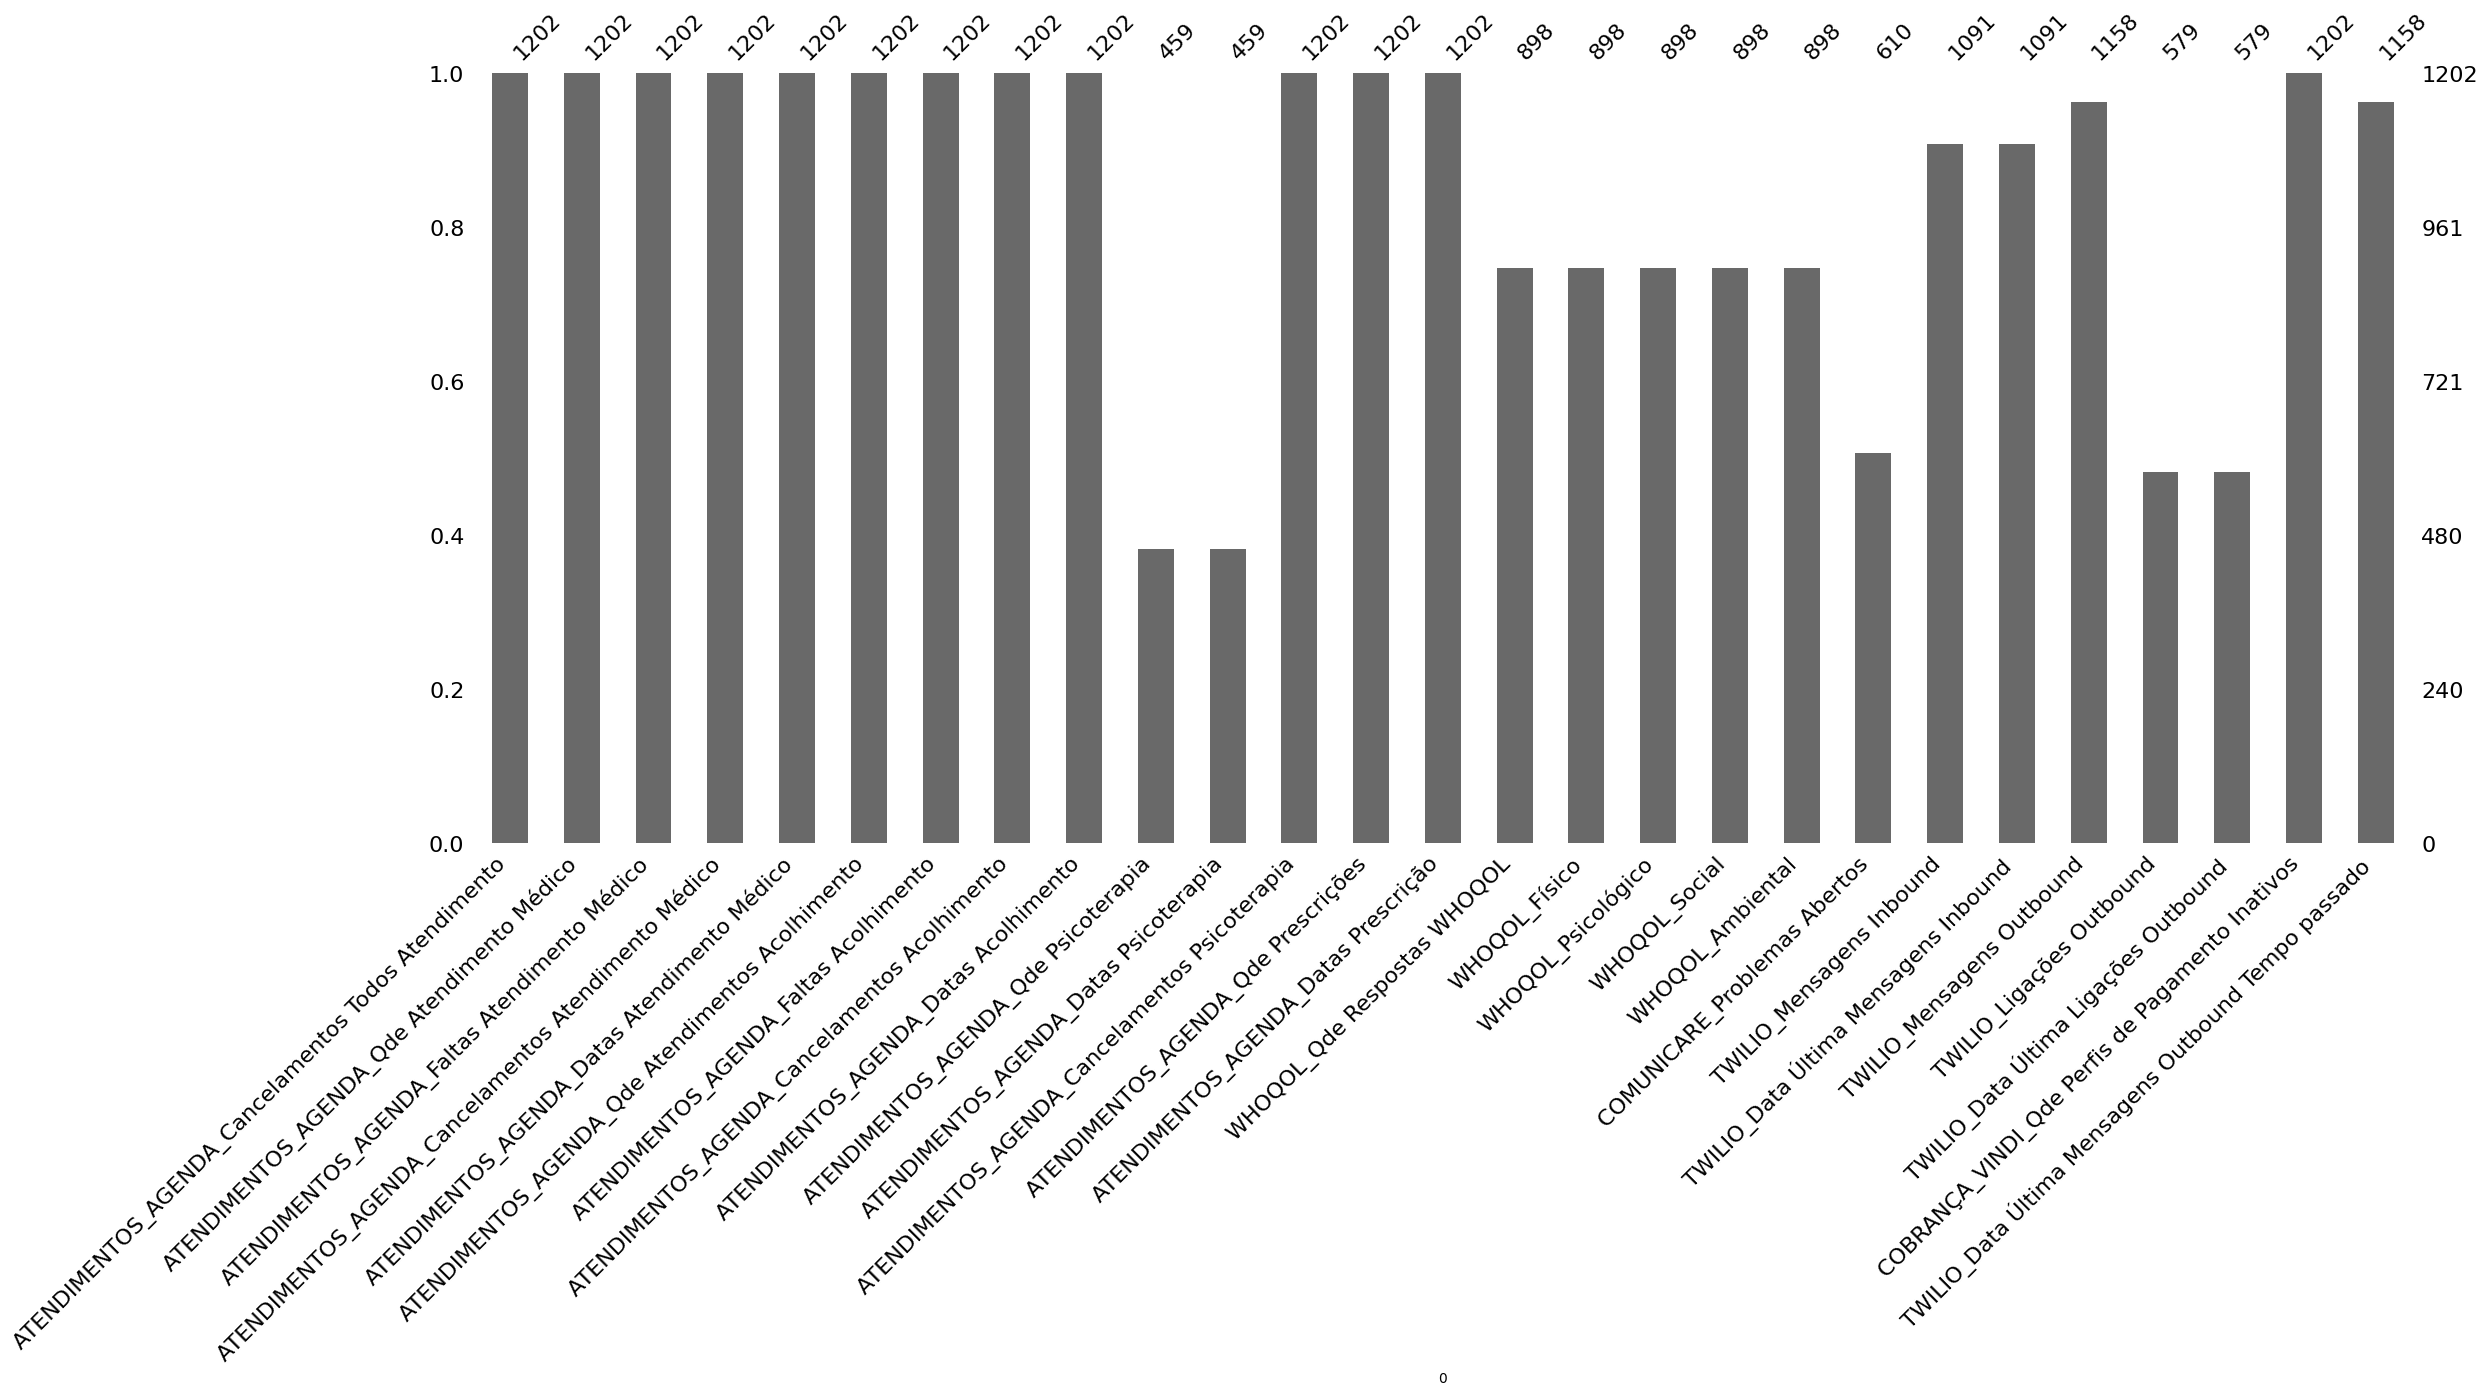

In [236]:
msno.bar(data.iloc[:,36:])

## TWILIO_Ligações Outbound

Descrição : Contagem de ligações feitas pela equipe de saúde

Observação : Valores Nan podem ser consideradores como "não há ligaçõess enviadas pela equipe de saúde", então iremos preencher com 0


In [237]:
data["TWILIO_Ligações Outbound"].value_counts(sort=False)

2      145
8        4
1      240
11       1
5       22
3       81
6       20
4       39
10       3
12       2
197      1
7       12
9        5
16       1
14       2
31       1
Name: TWILIO_Ligações Outbound, dtype: int64

In [238]:
data["TWILIO_Ligações Outbound"].fillna(0)

1       2
2       0
3       0
4       0
5       0
       ..
1198    0
1199    0
1200    0
1201    0
1202    0
Name: TWILIO_Ligações Outbound, Length: 1202, dtype: object

## TWILIO_DATA Última Ligações Outbound

Descrição : Contagem de ligação feitas pela equipe de saúde

Solução : Criamos uma nova TWILIO_DATA Última Ligações Outbound Tempo passado, que informa há quanto tempo a equipe de saúde realizou a última ligação


In [239]:
data["TWILIO_Data Última Ligações Outbound"].value_counts(sort=False)

2022-04-25 19:18:52    1
2022-02-17 21:28:03    1
2022-04-18 17:28:11    1
2023-06-06 07:59:43    1
2022-04-13 17:01:38    1
                      ..
2023-10-27 15:57:25    1
2023-10-26 09:23:42    1
2023-10-27 08:22:54    1
2023-10-30 15:45:18    1
2023-10-30 15:49:51    1
Name: TWILIO_Data Última Ligações Outbound, Length: 575, dtype: int64

In [240]:
from datetime import datetime

data["TWILIO_Data Última Ligações Outbound"] = pd.to_datetime(data["TWILIO_Data Última Ligações Outbound"])

data["TWILIO_Data Última Ligações Outbound Tempo passado"] = datetime.now() - data["TWILIO_Data Última Ligações Outbound"]


In [241]:
data["TWILIO_Data Última Ligações Outbound Tempo passado"].value_counts()

335 days 14:55:27.749273    3
51 days 01:50:12.749273     2
477 days 20:05:20.749273    2
289 days 15:26:55.749273    1
254 days 14:31:29.749273    1
                           ..
478 days 23:33:30.749273    1
482 days 18:43:17.749273    1
562 days 16:41:13.749273    1
610 days 20:00:42.749273    1
23 days 18:52:35.749273     1
Name: TWILIO_Data Última Ligações Outbound Tempo passado, Length: 575, dtype: int64

In [242]:
data = data.drop(["TWILIO_Data Última Ligações Outbound"], axis=1)

<AxesSubplot:xlabel='0'>

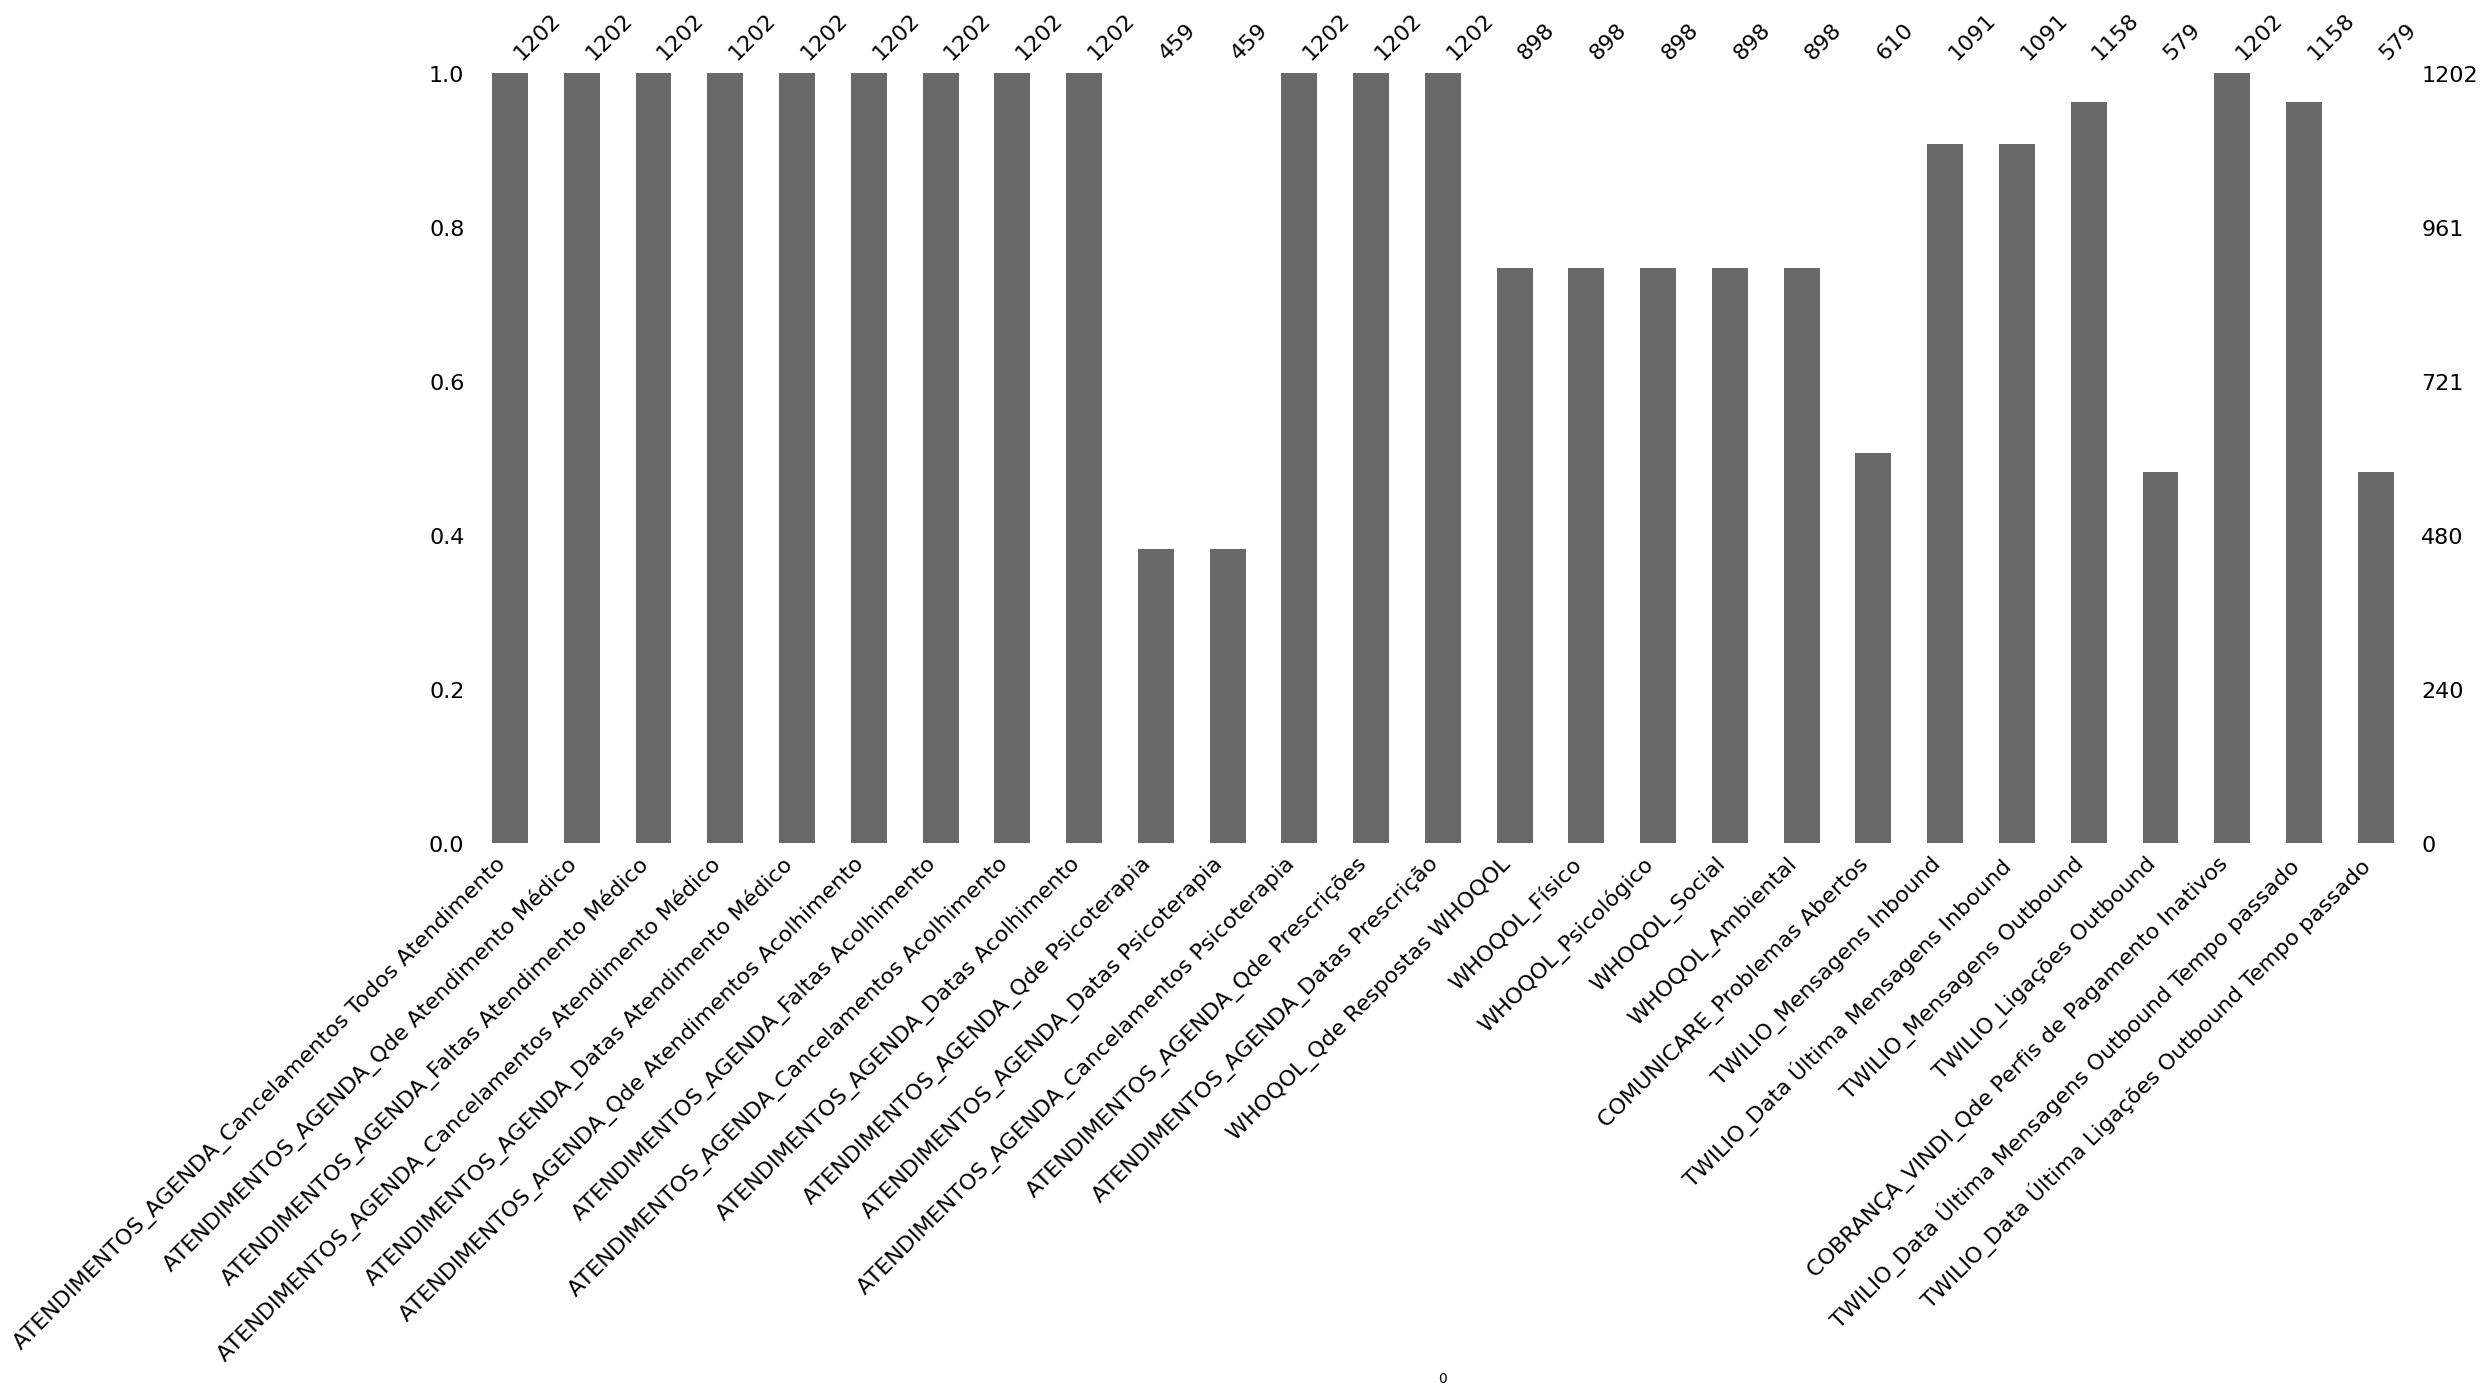

In [243]:
msno.bar(data.iloc[:,36:])

## COBRANÇA_VINDI_Qde Perfis de Pagamento Inativos

Descrição : Contagem de perfis de pagamento inativos de associados PF

Observação : Dropping column with no information


In [244]:
data["COBRANÇA_VINDI_Qde Perfis de Pagamento Inativos"].value_counts()

FALSE    1202
Name: COBRANÇA_VINDI_Qde Perfis de Pagamento Inativos, dtype: int64

In [245]:
data = data.drop(["COBRANÇA_VINDI_Qde Perfis de Pagamento Inativos"], axis=1)

<AxesSubplot:xlabel='0'>

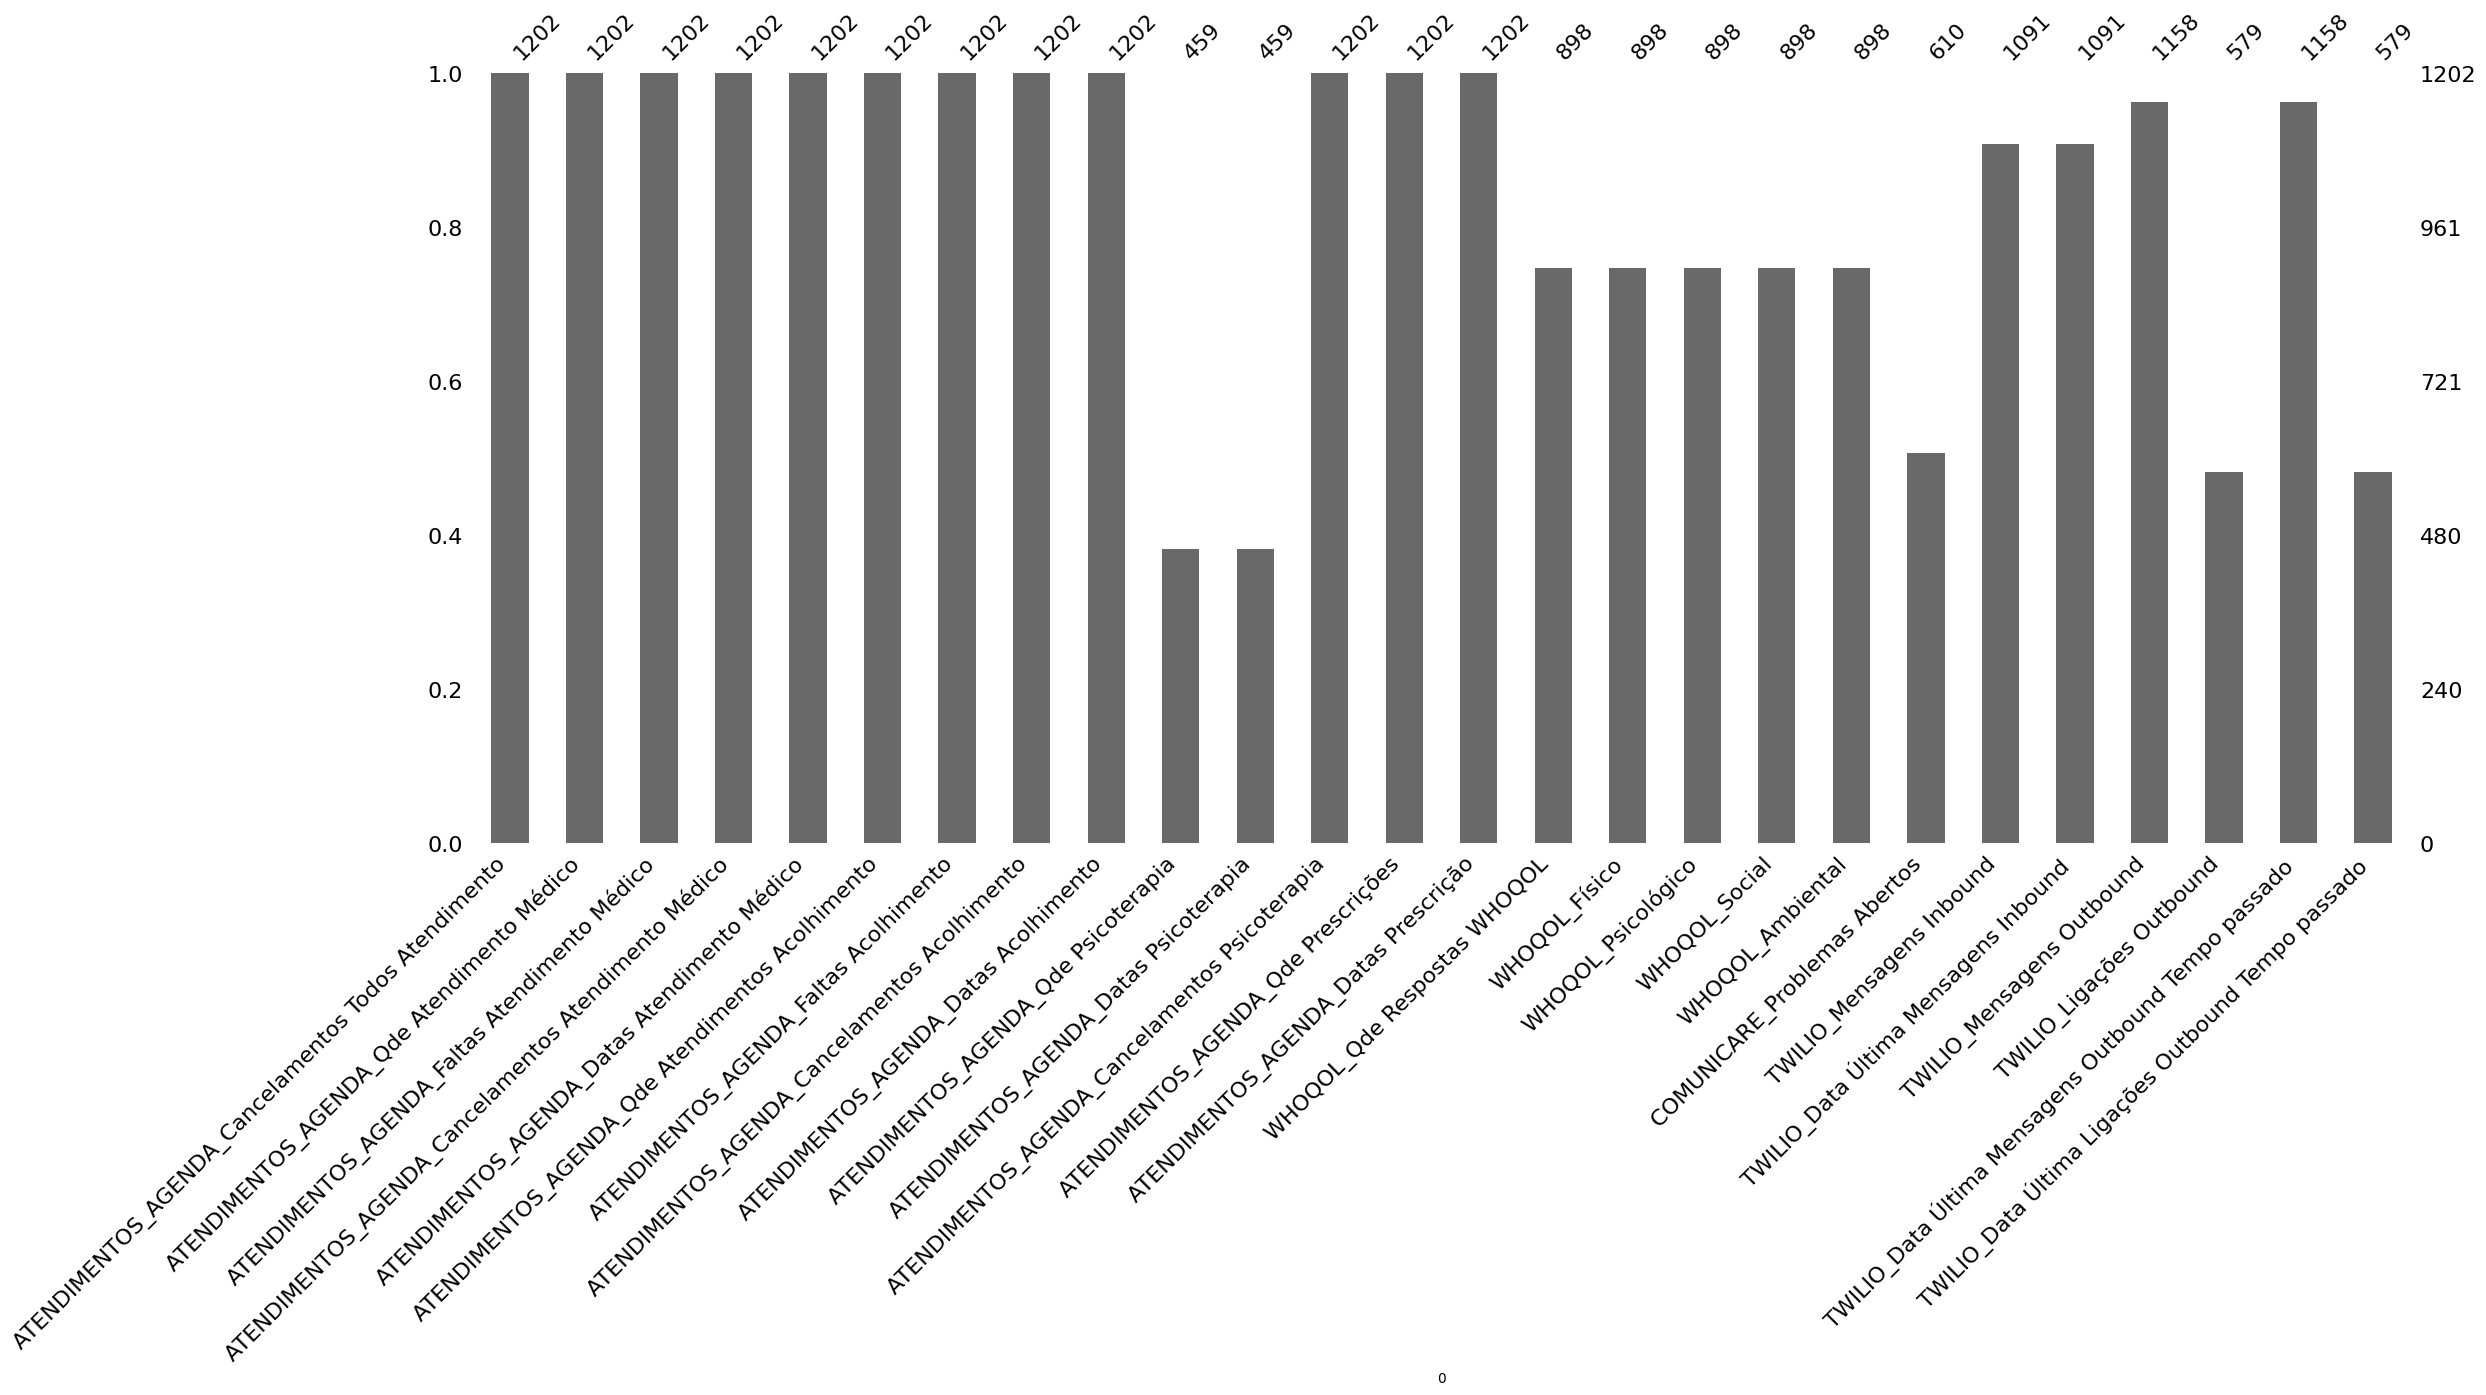

In [246]:
msno.bar(data.iloc[:,36:])